# Requirements

In [ ]:
import pandas as pd

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [ ]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 69.3MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
import pandas as pd


In [ ]:
df=pd.read_csv('/content/climate-data.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
df


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:

features=['meantemp','humidity','wind_speed','meanpressure']
df_nov=df[features]

In [ ]:
#Apply a lag of one, two, and three days to each feature
for feature in features:
  for i in range(1, 4):     # za site 4 koloni
    df_nov[f'{feature}_lag_{i}'] = df_nov[feature].shift(i)

In [ ]:

df_nov.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_lag_1        1
meantemp_lag_2        2
meantemp_lag_3        3
humidity_lag_1        1
humidity_lag_2        2
humidity_lag_3        3
wind_speed_lag_1      1
wind_speed_lag_2      2
wind_speed_lag_3      3
meanpressure_lag_1    1
meanpressure_lag_2    2
meanpressure_lag_3    3
dtype: int64

In [ ]:

df_nov=df_nov.dropna()
df_nov.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_lag_1        0
meantemp_lag_2        0
meantemp_lag_3        0
humidity_lag_1        0
humidity_lag_2        0
humidity_lag_3        0
wind_speed_lag_1      0
wind_speed_lag_2      0
wind_speed_lag_3      0
meanpressure_lag_1    0
meanpressure_lag_2    0
meanpressure_lag_3    0
dtype: int64

In [ ]:
x=df_nov.drop('meantemp',axis=1)
y=df_nov['meantemp']

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(1167, 15)

In [ ]:
Y_train.shape

(1167,)

In [ ]:
Y_test.shape

(292,)

In [ ]:
X_test.shape

(292, 15)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [ ]:

rf = RandomForestRegressor(n_estimators=150, criterion='squared_error', max_depth=10)

In [ ]:

rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=150)

In [ ]:
y_pred = rf.predict(X_test)

Use the trained model to make predictions for the test set.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(mean_squared_error(Y_test, y_pred))
print(mean_absolute_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))

1.5686822833463159
0.9621016508481044
0.9710240946055659


In [ ]:
import matplotlib.pyplot as plt

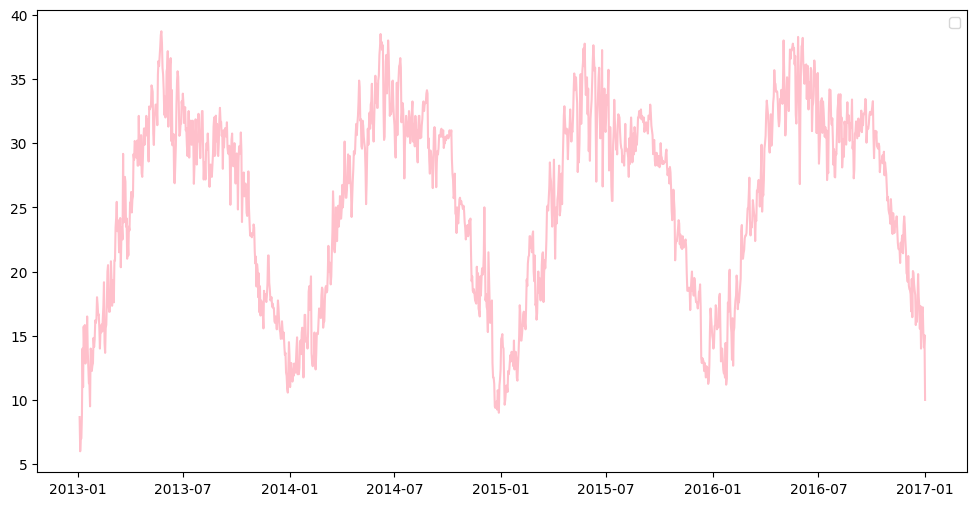

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_nov['meantemp'],color='pink')
plt.legend()
plt.show()

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 100,random_state=42)

model.fit(X_train, Y_train)

xgb_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:49:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Use the trained model to make predictions for the test set.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(mean_absolute_error(xgb_pred, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(xgb_pred, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(xgb_pred, Y_test))))

Mean Absolute Error : 1.0710597811233729
Mean Squared Error : 1.8242624121014945
Root Mean Squared Error : 1.3506525874929847
